# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [11]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [13]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby(["type"])["ride_id"].count()
total_rides.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
# 2. Get the total drivers for each city type
total_drivers=city_data_df.groupby(["type"])["driver_count"].sum()
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [30]:
#  3. Get the total amount of fares for each city type
total_fare=pyber_data_df.groupby(["type"])["fare"].sum()
#type(total_fare)
total_fare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [16]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride=total_fare.groupby(["type"]).sum()/total_rides.groupby(["type"]).sum()
average_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [40]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=total_fare.groupby(["type"]).sum()/total_drivers.groupby(["type"]).sum()
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [55]:
#  6. Create a PyBer summary DataFrame. 

pyber_dic={"Total Rides":total_rides,"Total Drivers":total_drivers,"Total Fares":total_fare,"Average Fare Ride":average_fare_per_ride,"Average Fare per Driver":average_fare_per_driver}
pyber_summary_df = pd.DataFrame(pyber_dic)

pyber_summary_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [56]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [57]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare Ride"] = pyber_summary_df["Average Fare Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [59]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [65]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indixes are the city type and date.

sum_of_fares=pyber_data_df.groupby(["type","date"])[["fare"]].sum()
sum_of_fares.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [70]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

sum_of_fares = sum_of_fares.reset_index()
sum_of_fares.head()

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33


In [97]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_fare_by_type_pivot = sum_of_fares.pivot(index="date", columns="type", values="fare")
sum_fare_by_type_pivot.head(10)



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [200]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_Jan_April = sum_fare_by_type_pivot.loc["2019-01-01":"2019-04-28"]

fares_Jan_April.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [201]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
fares_Jan_April.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [202]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [224]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_Jan_April_Perweek=fares_Jan_April.resample("w").sum()
fares_Jan_April_Perweek.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


C:\Users\AndrewZ\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


NameError: name 'Rural' is not defined

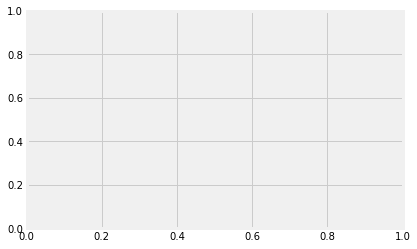

In [232]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot()
ax = plt.axes()
ax.plot (fares_Jan_April_Perweek[Rural], fares_Jan_April_Perweek[Suburban], fares_Jan_April_Perweek[Urban], marker="D", color="green", linewidth=2, label='Boston')
#Create labels for the x and y axes.
ax.set_xlabel("Date")
ax.set_ylabel("Rural","Suburban","Urban")
#Set the y limit between 0 and 2500.
ax.set_ylim(0, 2500)
# Create a title.
plt.title("Total Fare by City Type")
# Add a grid.
ax.grid()
# Add the legend.
ax.legend()


# Import the style from Matplotlib.
#from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

C:\Users\AndrewZ\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


NameError: name 'Rural' is not defined

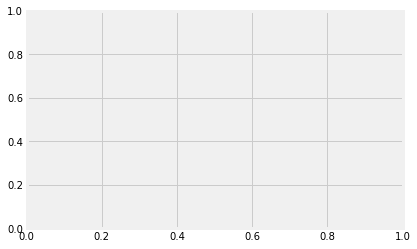

In [228]:

# Save the figure. 
plt.savefig("analysis/PyBer_fare_summary.png")

# Show the plot ( always should be last) 
plt.show()

<Figure size 432x288 with 0 Axes>